# PROJEKT II: Amazon Top 50 Bestselling Books 2009 - 2019

In this project we'll use an amazon dataset with the top bestselling books from 2009 to 2019. The dataset consists of book's name and author, along with user rating, number of reviews, price, release year and genre. In this project i'll be looking for correlations between books features.

            key features: EDA, Data Visualization, Seaborn

#### Objectives:

   * EDA
       * Analyse for correlation between book features

#### Steps:

   * Data Preparation
   * Data Analysis and Vizualization
   
#### Graphs:

   * Titles rating
   * Authors with most bestsellers citations
   * Books with most bestsellers citations
   * Price-Review ratio
   * Price-Rating ratio
   * Rating by authors
   * Averages

In [1]:
#lib imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#load dataset
df = pd.read_csv('data/bestsellers with categories.csv')

In [2]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


As always, lets look for NaN values

In [5]:
df.isnull().describe()

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550,550,550,550,550
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,550,550,550,550,550,550,550


<AxesSubplot:>

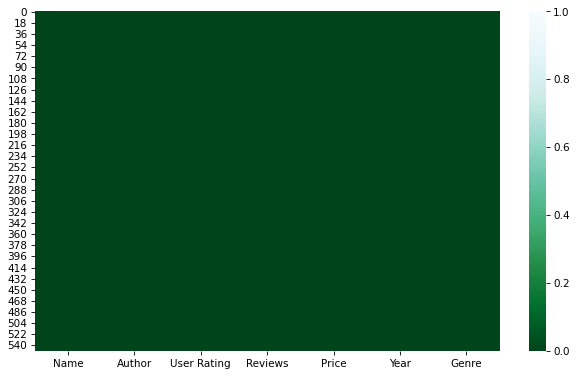

In [6]:
plt.subplots(figsize=(9, 6), dpi=75)
sns.heatmap(data = df.isnull(), vmin = 0,vmax = 1, cmap = 'BuGn_r')

No null values, making easier for us.

In [7]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


### Data Analysis and Visualization

#### Counts

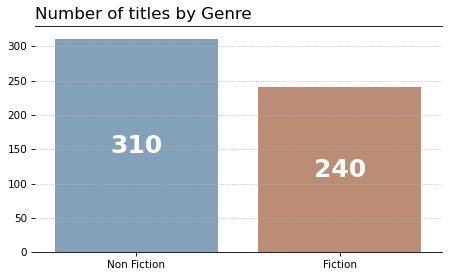

In [115]:
#Genre Counts
fig, ax = plt.subplots(figsize=(7, 4), dpi=75)
sns.countplot(data = df, x = 'Genre', palette = 'twilight_shifted')

#titulos e eixos
ax.set_ylim(0,330)
ax.set_title ("Number of titles by Genre", 
              loc = 'left', 
              fontsize = 16)
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

#Colocar pontos das notas
number_list = [0,1]
ticks = df['Genre'].value_counts().reset_index(drop=True)
ticks.head()
ticks[1]

for i in number_list:
    ax.text(x = i, y = (ticks[i])/2, 
            s=ticks[i], 
            horizontalalignment= 'center', verticalalignment='center', 
            fontsize=24, color = 'White', fontweight='bold')

Text(0.5, 0, '')

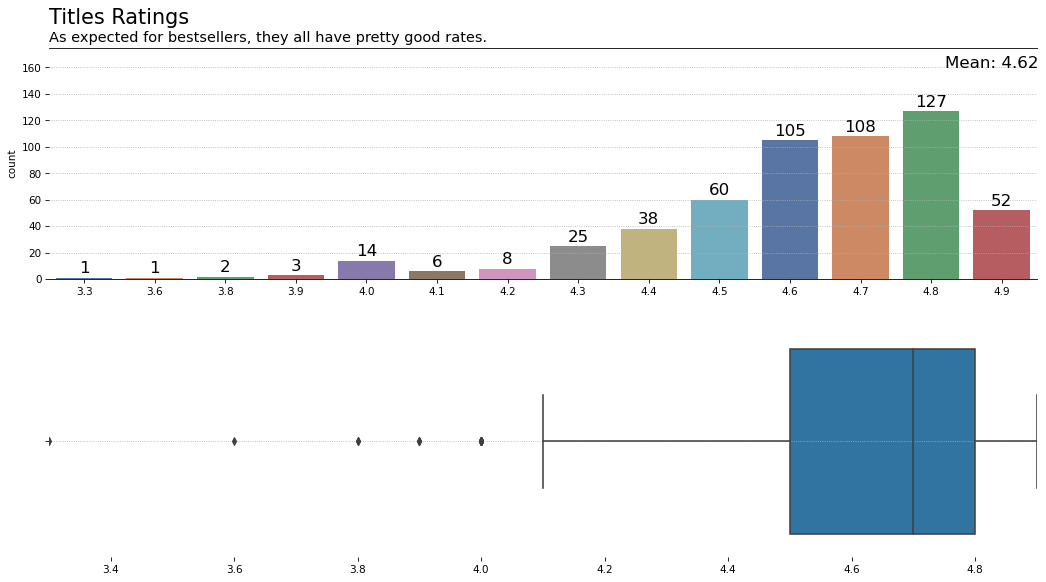

In [122]:
#Rating Counts
fig, (ax1,ax2)  = plt.subplots(2, 1, figsize=(17,9), dpi=75)

#plot1
sns.countplot(data = df, x = 'User Rating', palette='deep', ax = ax1)

#eixos1
xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
#títulos & Eixos 1
ax1.set_title ("As expected for bestsellers, they all have pretty good rates.",
              loc = 'left', 
              fontsize = 14)
ax1.text(s = 'Titles Ratings',
        fontsize = 20,
        x=xmin, 
        y=ymax*1.45)
ax1.set_ylim(0,175)
ax1.grid(axis = 'y',linestyle = 'dotted')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_xlabel('')

#nota média
xmean = df['User Rating'].mean()
ax1.text(s = f'Mean: {round(xmean,2)}',
       x = 12.2,y = ymax*1.2,
       fontsize = 16)

#Colocar pontos das notas (row _3).
number_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
ticks = df['User Rating'].value_counts().sort_index(ascending = True).to_list()
for i in number_list:
    ax1.text(x = i, y = ticks[i]+7, s=ticks[i], horizontalalignment= 'center', verticalalignment='center', fontsize=16)
     
#plot 2
sns.boxplot(data = df, x = 'User Rating', ax = ax2)
#títulos & Eixos 2
ax2.set_xlim(3.3,4.9)
ax2.grid(axis = 'y',linestyle = 'dotted')
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xlabel('')

#### Comparisons

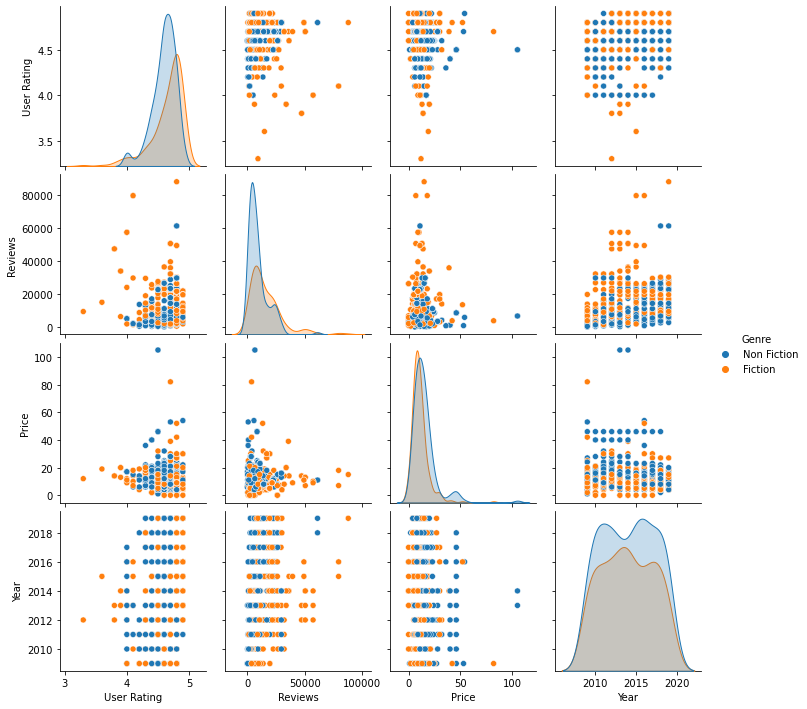

In [13]:
#pairplot correlations
sns.pairplot(data = df, hue = 'Genre')

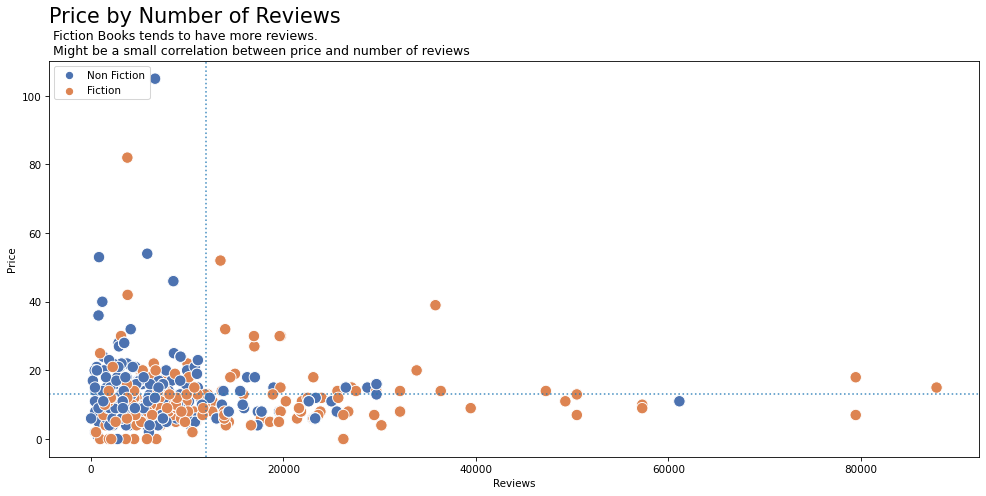

In [14]:
#Price by Number of Reviews
fig, ax = plt.subplots(figsize=(16, 7), dpi=75)
sns.scatterplot(data = df, 
                x = 'Reviews', 
                y = 'Price',
                hue = 'Genre',
                s = 120,
                palette= 'deep'
                )

#Mean Lines
meanx = df['Reviews'].mean()
meany = df['Price'].mean()
xline = ax.axvline(meanx, linestyle='dotted', alpha=0.8)
yline = ax.axhline(meany, linestyle='dotted', alpha=0.8)

#Títulos e Eixos
ax.set_title(' Fiction Books tends to have more reviews.'
             '\n Might be a small correlation between price and number of reviews',
            fontdict = {'fontsize': 12},
            loc = 'left')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.text(s = 'Price by Number of Reviews',
        fontsize = 20,
        x=xmin, 
        y=ymax*1.10)
ax.legend(loc = 'upper left', fontsize = 'medium')


No handles with labels found to put in legend.


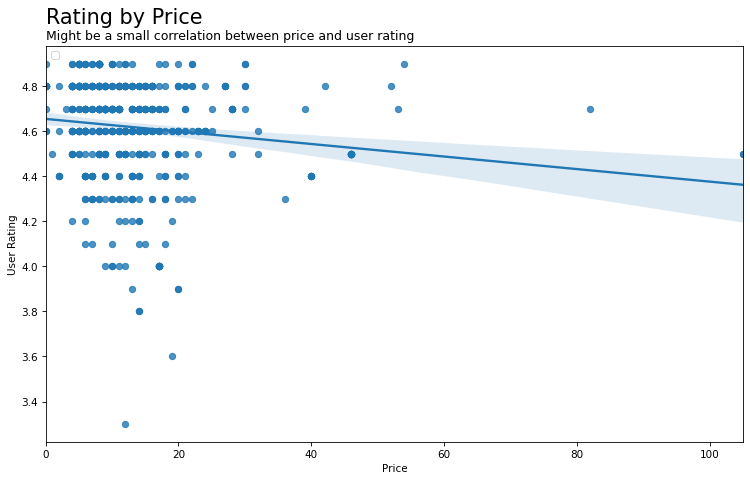

In [15]:
#Rating by Price
fig, ax = plt.subplots(figsize=(12, 7), dpi=75)
ax = sns.regplot(x = "Price", y = "User Rating", data=df)

#Títulos e Eixos
ax.set_title('Might be a small correlation between price and user rating',
            fontdict = {'fontsize': 12},
            loc = 'left')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.text(s = 'Rating by Price',
        fontsize = 20,
        x=xmin, 
        y=ymax+.1)
ax.legend(loc = 'upper left', fontsize = 'medium')

#### Tops

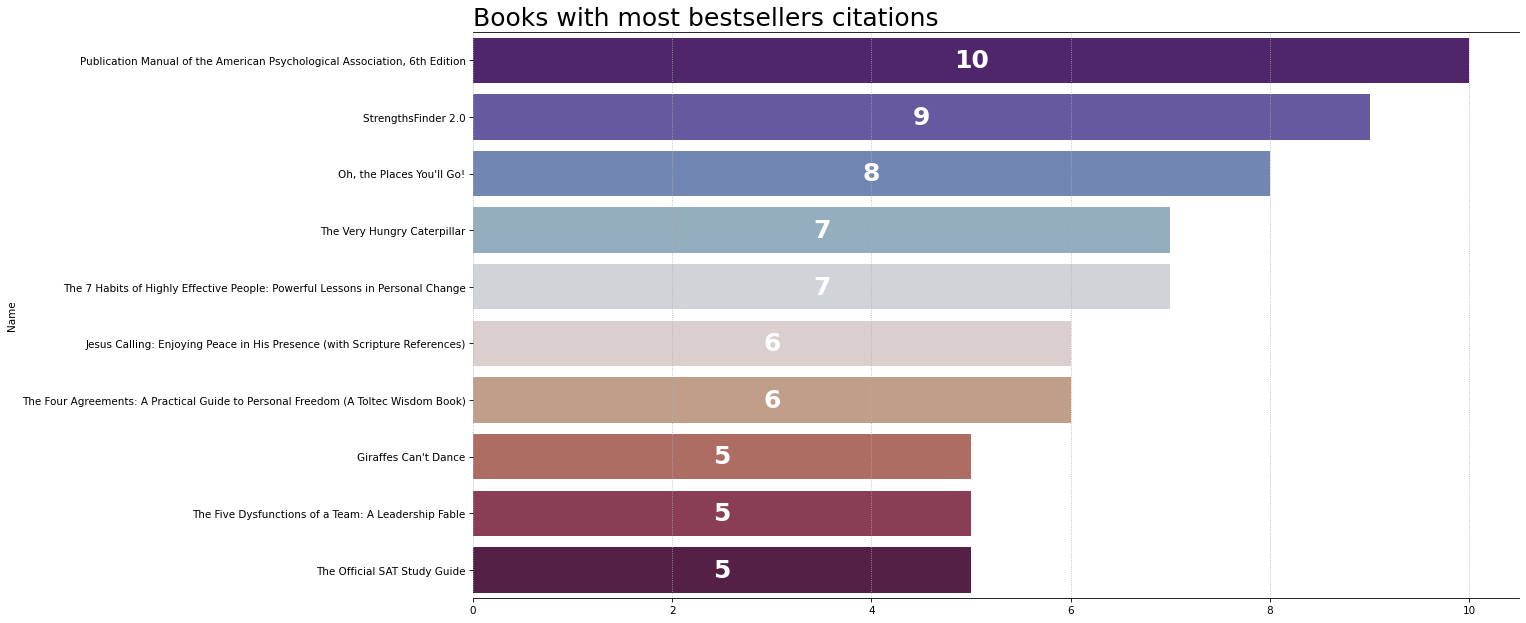

In [18]:
#Books with most bestsellers citations
df_books = df['Name'].value_counts().to_frame().reset_index().rename(columns={'Name':'Count','index':'Name'})

#plot
fig, ax = plt.subplots(figsize=(18, 10), dpi=75)
sns.barplot(data = df_books[:10], x = "Count", y = 'Name', palette = 'twilight_shifted')

#titulos e eixos
ax.set_title ("Books with most bestsellers citations", 
              loc = 'left', 
              fontsize = 24)
ax.grid(axis = 'x',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')

#Colocar pontos das notas
number_list = [0,1,2,3,4,5,6,7,8,9]
ticks = df_books.reset_index(drop=True)
ticks.head()

for i in number_list:
    ax.text(y = i, x = (ticks['Count'][i])/2, 
            s=round(ticks['Count'][i]), 
            horizontalalignment= 'center', verticalalignment='center', 
            fontsize=24, color = 'White', fontweight='bold')

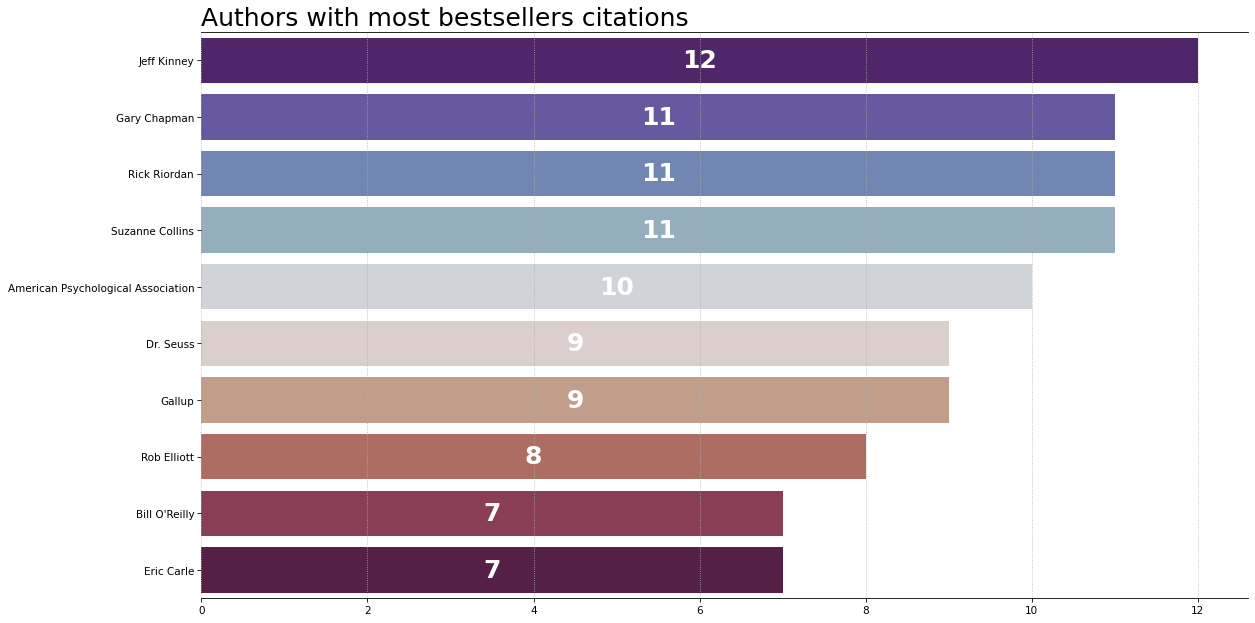

In [19]:
#Authors with most bestsellers citations
df_author= df['Author'].value_counts().to_frame().reset_index().rename(columns={'Author':'Count','index':'Author'})

#plot
fig, ax = plt.subplots(figsize=(18, 10), dpi=75)
sns.barplot(data = df_author[:10], x = "Count", y = "Author", palette = 'twilight_shifted')

#titulos e eixos
ax.set_title ("Authors with most bestsellers citations", 
              loc = 'left', 
              fontsize = 24)
ax.grid(axis = 'x',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

#Colocar pontos das notas
number_list = [0,1,2,3,4,5,6,7,8,9]
ticks = df_author.reset_index(drop=True)
ticks.head()

for i in number_list:
    ax.text(y = i, x = (ticks['Count'][i])/2, 
            s=round(ticks['Count'][i]), 
            horizontalalignment= 'center', verticalalignment='center', 
            fontsize=24, color = 'White', fontweight='bold')

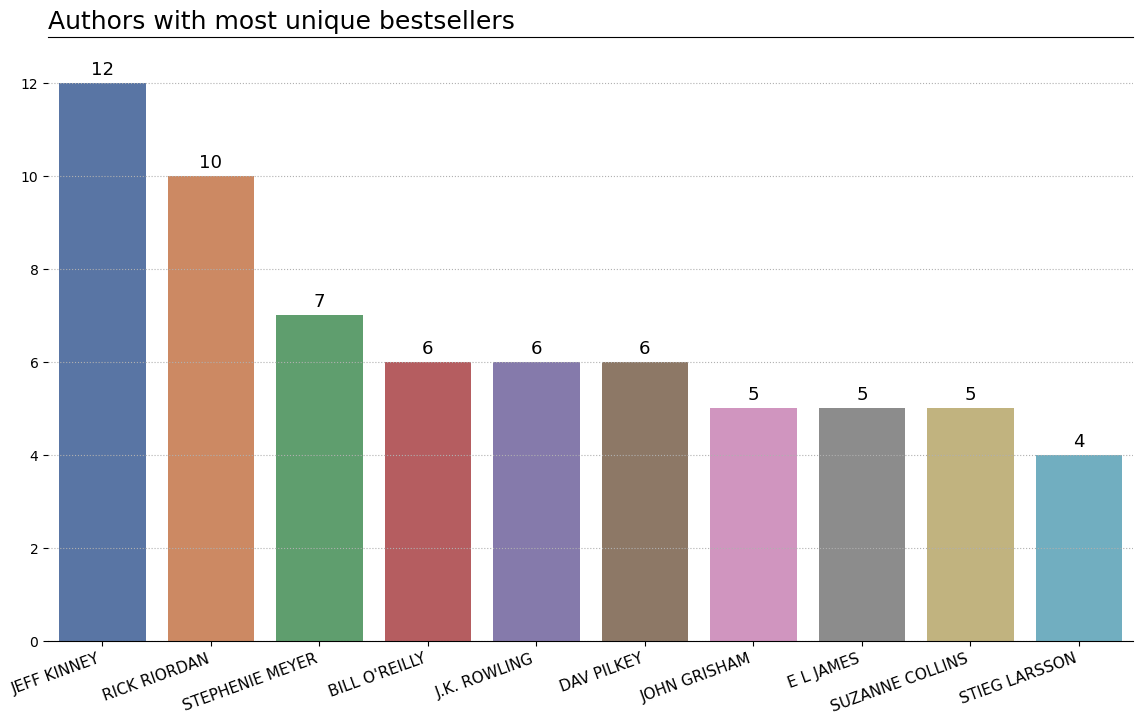

In [103]:
#Authors with most unique bestsellers
df_unique = df.drop_duplicates(subset = 'Name')
df_unique = df_unique['Author'].value_counts().to_frame().reset_index().rename(columns={'Author':'Count','index':'Author'})

#Criar plot
fig, ax = plt.subplots(figsize=(14,8), dpi= 100)
sns.barplot(data = df_unique[:10], x = "Author" , y = 'Count', palette = "deep")

#Títulos & Eixos
ax.set_title ("Authors with most unique bestsellers", loc = 'left', fontsize = 18)
ax.set_xticklabels(df_unique['Author'][:10].str.upper(), rotation=20, fontdict={'horizontalalignment': 'right', 'size':11})
ax.set_ylim(0,13)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.grid(axis = 'y',linestyle = 'dotted')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')


#Colocar pontos das notas.
number_list = [0,1,2,3,4,5,6,7,8,9]
ticks = df_unique.reset_index(drop=True)
for i in number_list:
    ax.text(x = i, y = ticks['Count'][i]+0.1, s=ticks['Count'][i], horizontalalignment= 'center', verticalalignment='bottom', fontsize=13)

#### Averages

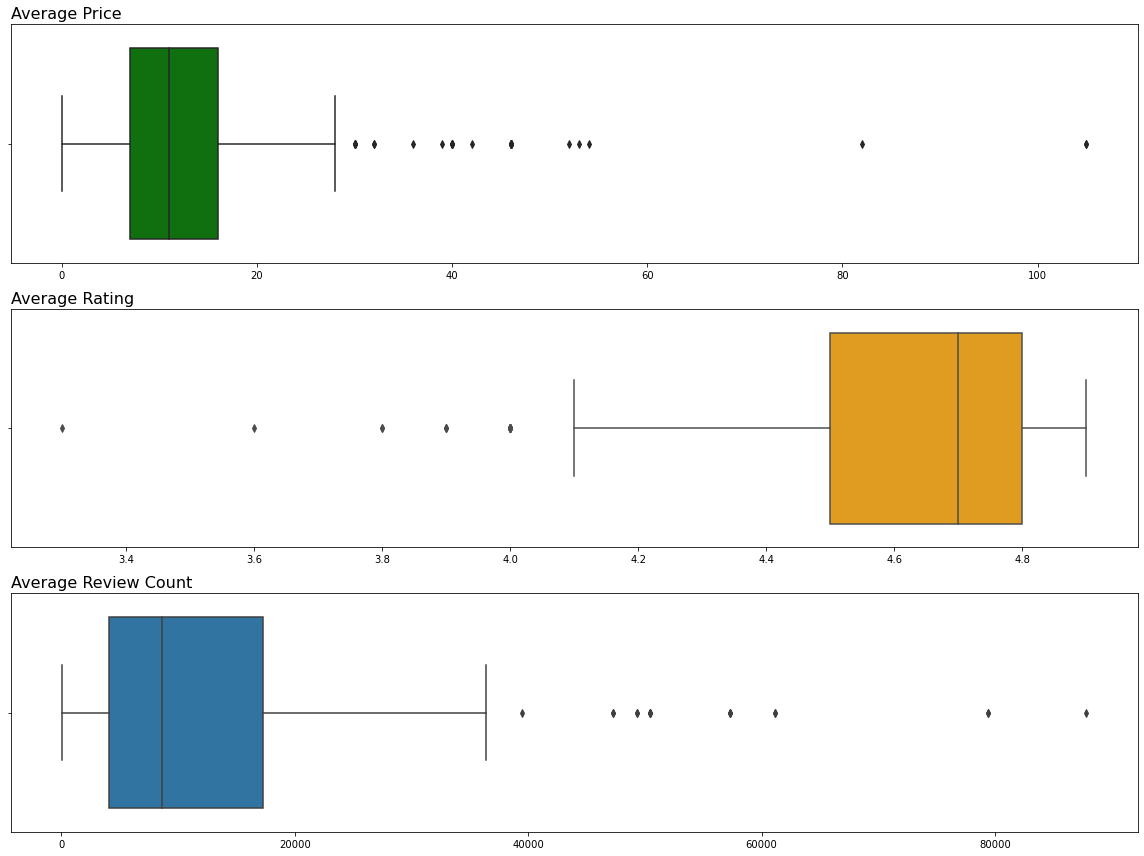

In [54]:
#average rating, price and review count
fig, (ax1,ax2, ax3) = plt.subplots(3, 1, figsize = (16,12))

sns.boxplot(data = df, x = 'Price', ax = ax1, color = 'Green')
ax1.set_title('Average Price', loc = 'left', fontsize = 16)
ax1.set_xlabel('')

sns.boxplot(data = df, x = 'User Rating', ax = ax2, color = 'Orange')
ax2.set_title('Average Rating', loc = 'left', fontsize = 16)
ax2.set_xlabel('')

sns.boxplot(data = df, x = 'Reviews', ax = ax3)
ax3.set_title('Average Review Count', loc = 'left', fontsize = 16)
ax3.set_xlabel('')

fig.tight_layout()

Text(4.7808, -0.6, 'Mean: 4.62')

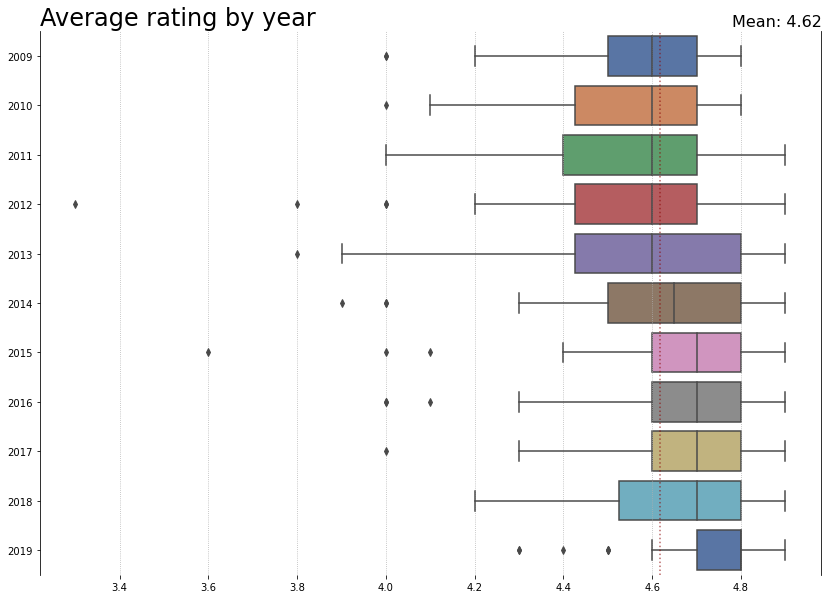

In [92]:
#average rating by year
fig, ax = plt.subplots(figsize = (14,10))
sns.boxplot(data = df, x = 'User Rating', y = 'Year',orient = "h", palette = 'deep')

#titulos e eixos
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_title ("Average rating by year", 
              loc = 'left', 
              fontsize = 24)
ax.grid(axis = 'x',linestyle = 'dotted')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

#mean line
xmean = df['User Rating'].mean()
ax.axvline(xmean, linestyle='dotted', alpha=0.6, color = 'darkred')
ax.text(s = f'Mean: {round(xmean,2)}',
       y = ymax*1.2,x = xmax*0.96,
       fontsize = 16)

In [65]:
df['User Rating'].mean()

4.618363636363641

Text(0, 0.5, '')

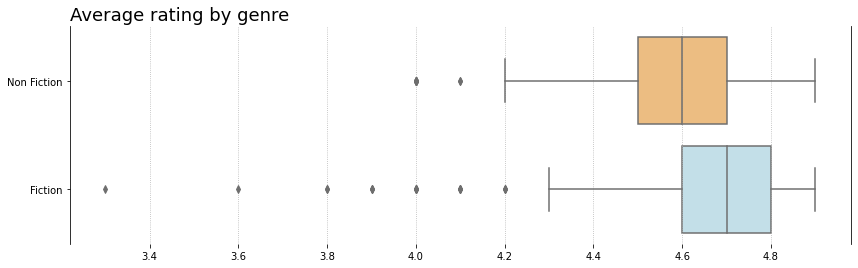

In [102]:
#average rating by genre
fig, ax = plt.subplots(figsize = (14,4))
sns.boxplot(data = df, x = 'User Rating', y = 'Genre', palette='RdYlBu')
#titulos e eixos
#ax.set_xlim(3,5)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_title ("Average rating by genre", 
              loc = 'left', 
              fontsize = 18)
ax.grid(axis = 'x',linestyle = 'dotted')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')